# Aticha Amie Prasongsukarn

## Research question/interests

**What are the average healthcare costs and income for different age groups?**
For this question, I plan to calculate the average healthcare cost and income for each age group and produce a graph where the x-axis is the age group and the y-axis is the amount. The graph will be plotted as a bar chart with 2 bars for each age group side by side, 1 for healthcare cost and the other for income.

**Does the age group correlate with healthcare costs in a set of data collected from several regions in the US?**
I plan to create a scatter plot for this question and see whether the data will create a correlated outcome that will be clear enough to create a line/curve of best fit or not. If the plot produced shows a weak correlation, I could add error bars and find the outlier for the dataset and drop those outliers. Thus, refining the dataset further and creating a stronger dataset.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
medcost = pd.read_csv("../data/raw/medical_expense.csv")
medcost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
income = pd.read_csv("../data/raw/adult_income.csv")
income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Research Question 1: What are the average healthcare costs and income for different age groups?

* remove unneccessary columns from each dataset

In [5]:
med_clean1 = medcost.drop(['sex', 'bmi','children', 'smoker', 'region'], axis = 1)
med_clean1

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


In [80]:
income_clean1 = income.drop(['workclass', 'education', 'fnlwgt', 'education.num', 'race','marital.status','occupation','relationship','sex','capital.gain','capital.loss','hours.per.week','native.country'], axis = 1)
income_clean1

,age,income
0,90,<=50K
1,82,<=50K
2,66,<=50K
3,54,<=50K
4,41,<=50K
...,...,...
32556,22,<=50K
32557,27,<=50K
32558,40,>50K
32559,58,<=50K


* Combine both medical expense dataset and income dataset based on age using full outer join  thus allowing all combinations from both dataframe ie NaN will occur if data is missing in one dataframe.

In [81]:
rq1df = pd.merge(med_clean1, income_clean1, on = "age", how = "outer")
rq1df

,age,charges,income
0,19,16884.924,<=50K
1,19,16884.924,<=50K
2,19,16884.924,<=50K
3,19,16884.924,<=50K
4,19,16884.924,<=50K
...,...,...,...
885508,85,NaN,<=50K
885509,85,NaN,<=50K
885510,85,NaN,<=50K
885511,86,NaN,<=50K


* remove any rows with missing values ie cleaning the resulting dataframe

In [82]:
rq1df_clean = rq1df.dropna(axis=0)
rq1df_clean

,age,charges,income
0,19,16884.92400,<=50K
1,19,16884.92400,<=50K
2,19,16884.92400,<=50K
3,19,16884.92400,<=50K
4,19,16884.92400,<=50K
...,...,...,...
883777,39,7201.70085,<=50K
883778,39,7201.70085,<=50K
883779,39,7201.70085,<=50K
883780,39,7201.70085,>50K


* Group data by age group and calculate the average healthcare cost and income for each age group

In [83]:
finaldf1 = pd.DataFrame(set(rq1df_clean['age']))
finaldf1.columns = ["age_group"]
finaldf1

,age_group
0,18
1,19
2,20
3,21
4,22
5,23
6,24
7,25
8,26
9,27


In [84]:
avg_cost = rq1df_clean.groupby(['age'],as_index=False)['charges'].mean()
avg_cost

,age,charges
0,18,7086.217556
1,19,9747.909335
2,20,10159.697736
3,21,4730.464330
4,22,10012.932802
5,23,12419.820040
6,24,10648.015962
7,25,9838.365311
8,26,6133.825309
9,27,12184.701721


In [85]:
conditions = [(finaldf1["age_group"] == avg_cost["age"])]
values = [avg_cost["charges"]]
finaldf1["average cost"] = np.select(conditions,values)
finaldf1

,age_group,average cost
0,18,7086.217556
1,19,9747.909335
2,20,10159.697736
3,21,4730.464330
4,22,10012.932802
5,23,12419.820040
6,24,10648.015962
7,25,9838.365311
8,26,6133.825309
9,27,12184.701721


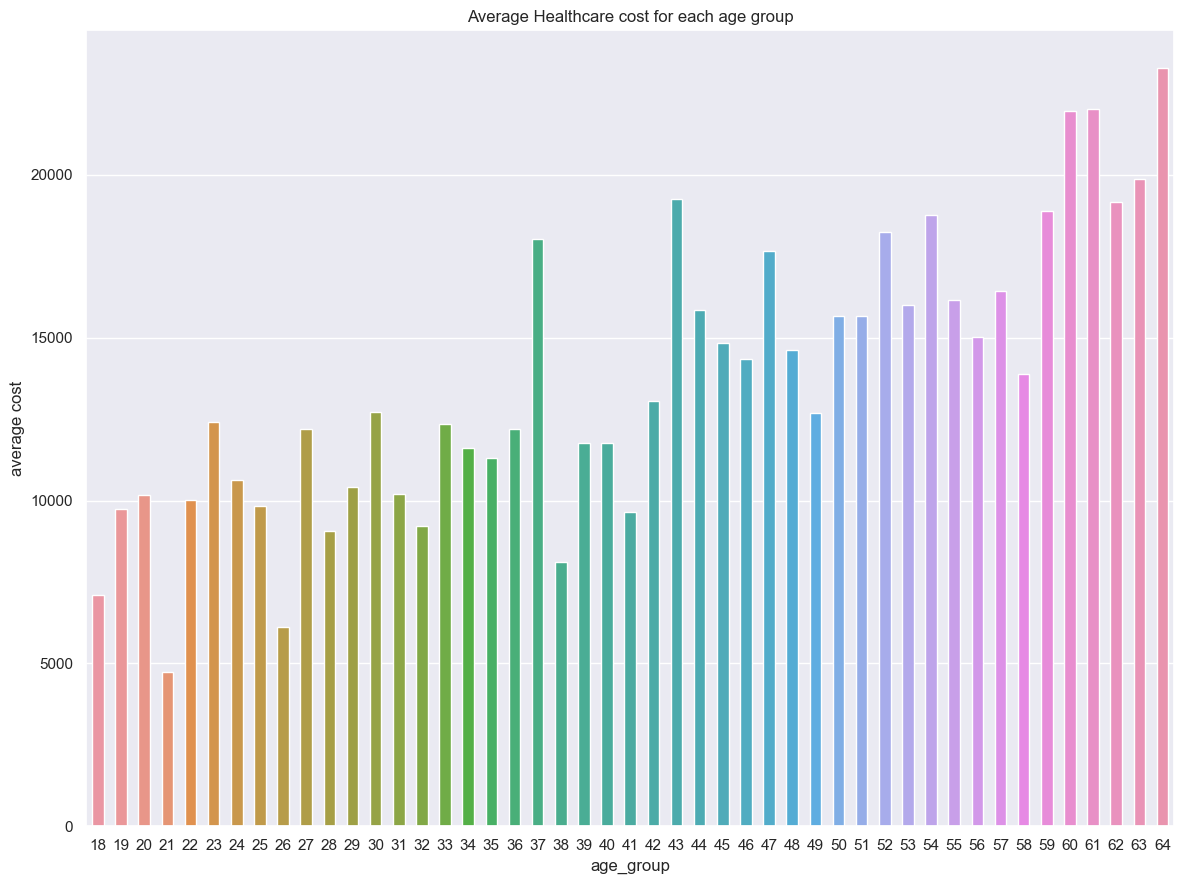

In [88]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.barplot(x = 'age_group', y = 'average cost', data = finaldf1, width=0.5)
ax.set(title = "Average Healthcare cost for each age group")
plt.tight_layout()
plt.show()

### Research Question 2: Does the age group correlate with healthcare costs in a set of data collected from several regions in the US?

In [80]:
med_clean2 = medcost.drop(['sex', 'bmi','children', 'smoker'], axis = 1)
med_clean2

,age,region,charges
0,19,southwest,16884.92400
1,18,southeast,1725.55230
2,28,southeast,4449.46200
3,33,northwest,21984.47061
4,32,northwest,3866.85520
...,...,...,...
1333,50,northwest,10600.54830
1334,18,northeast,2205.98080
1335,18,southeast,1629.83350
1336,21,southwest,2007.94500


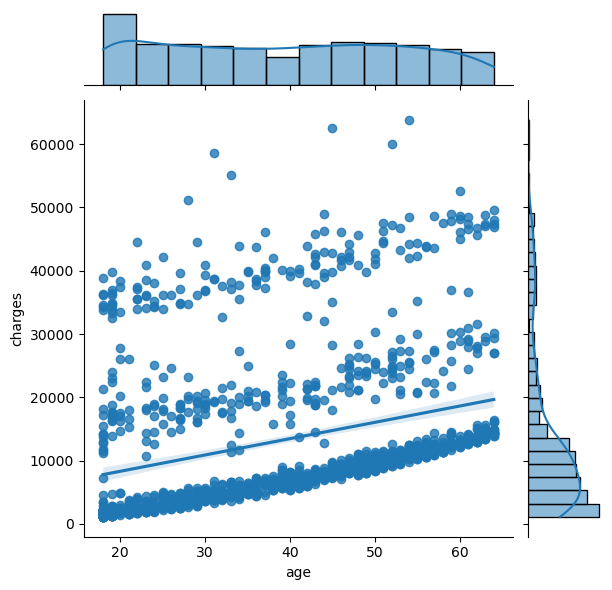

In [88]:
sns.jointplot(x='age', y='charges', data=med_clean2, kind='reg')